Task - 4 
__SALES PREDICTION USING PYTHON__

AUTHOR : Bunga Rohit kalyan

BATCH : September

DOMAIN : Data science

AIM : Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Import important libraries

In [5]:
df = pd.read_csv("C:/Users/dell/OneDrive/Desktop/Codesoft/advertising.csv")
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [13]:
df.isnull().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
df.corr()


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


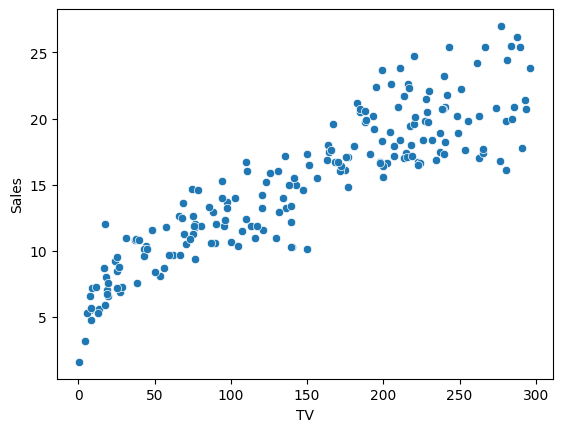

In [17]:
sns.scatterplot(x='TV', y='Sales', data=df)
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


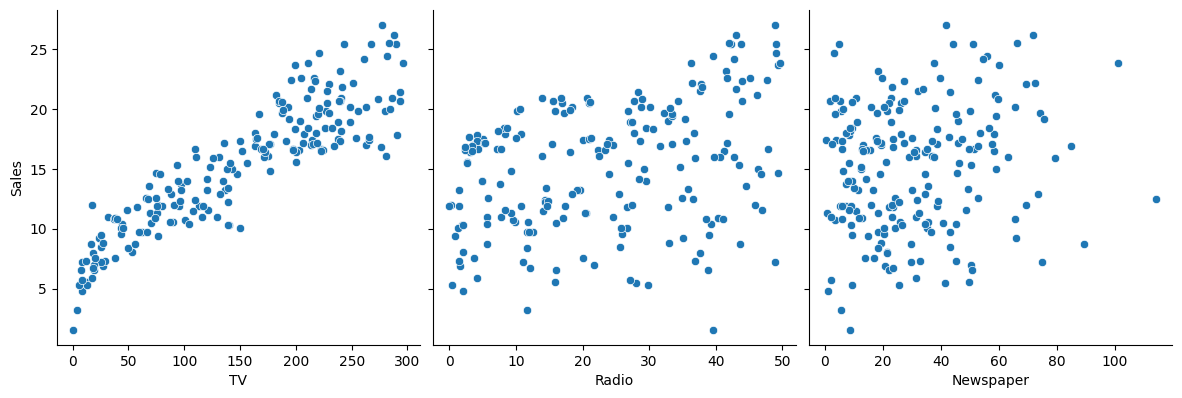

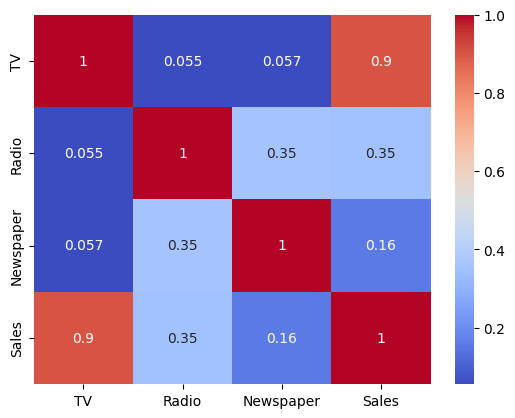

In [9]:
df.info()
df.describe()

sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [10]:
X = df[['TV','Radio','Newspaper']]   # Features
y = df['Sales']                      # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 4.714126402214127
Coefficients: [0.05450927 0.10094536 0.00433665]


Mean Squared Error: 2.9077569102710896
R2 Score: 0.9059011844150826


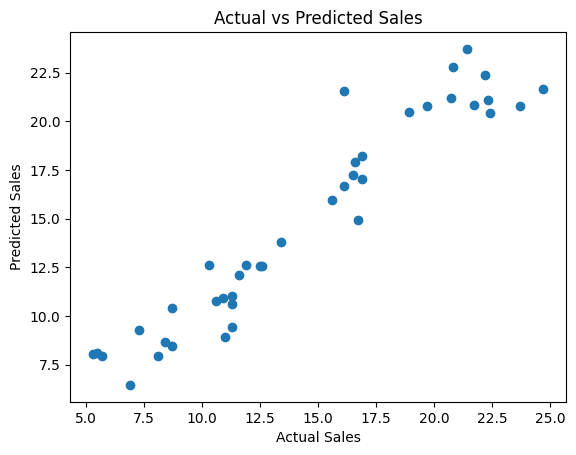

In [12]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


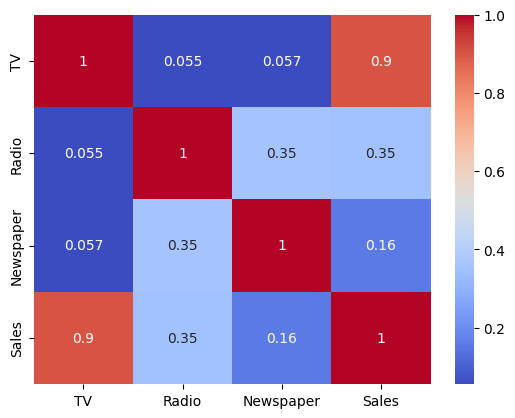

In [16]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


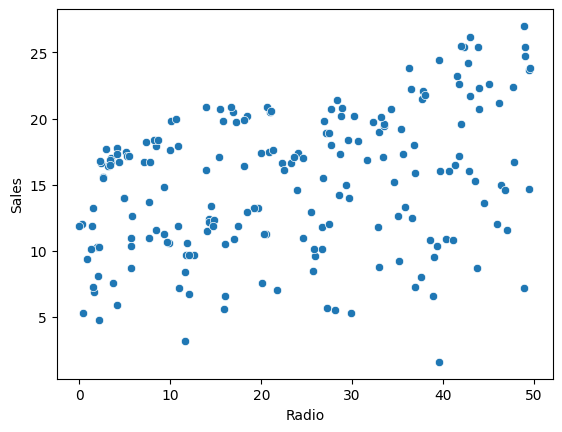

In [18]:
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.show()


In [19]:
X = df[['TV','Radio','Newspaper']]
y = df['Sales']


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(160, 3) (40, 3) (160,) (40,)


In [22]:
from sklearn.linear_model import LinearRegression


Import Model

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
model.intercept_


np.float64(4.714126402214127)

In [25]:
model.coef_


array([0.05450927, 0.10094536, 0.00433665])

In [26]:
y_pred = model.predict(X_test)


In [27]:
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_compare.head()


,Actual,Predicted
95,16.9,17.034772
15,22.4,20.409740
30,21.4,23.723989
158,7.3,9.272785
128,24.7,21.682719


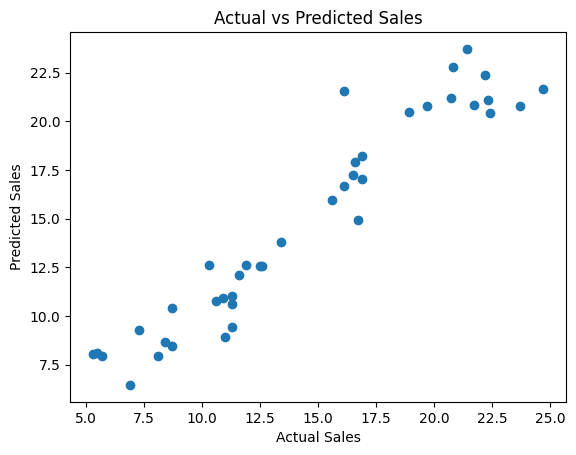

In [28]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


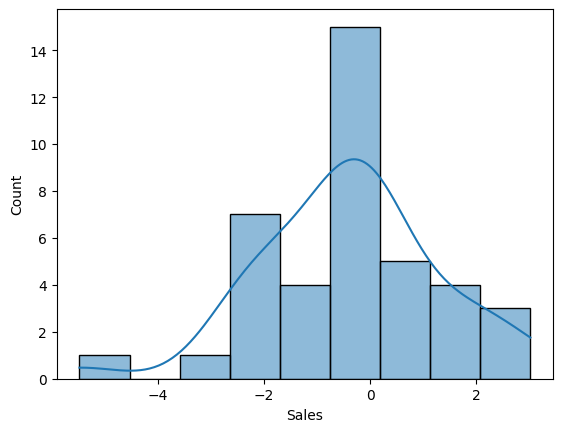

In [29]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.show()


In [31]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree R2:", r2_score(y_test, dt_pred))


Decision Tree R2: 0.8899068317956319


In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

X_test_poly = poly.transform(X_test)
poly_pred = poly_model.predict(X_test_poly)

print("Polynomial R2:", r2_score(y_test, poly_pred))


Polynomial R2: 0.9533174341074713


In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validation scores:", scores)
print("Mean CV Score:", scores.mean())


Cross-validation scores: [0.87556263 0.93177791 0.92150403 0.84554586 0.90247132]
Mean CV Score: 0.8953723525274102


In [35]:
import joblib
joblib.dump(model, "sales_prediction_model.pkl")


['sales_prediction_model.pkl']